# Importing libraries

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics


import numpy as np
import pandas as pd
from scipy.special import comb

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import (KFold,RepeatedKFold, LeaveOneOut, StratifiedKFold, train_test_split, cross_validate,LeavePOut)


In [42]:
#read the data
df = pd.read_csv("Dry_Bean_Data_Final.csv")

# Checking Missing Values

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13600 entries, 0 to 13599
Data columns (total 17 columns):
Area               13600 non-null int64
Perimeter          13600 non-null float64
MajorAxisLength    13600 non-null float64
MinorAxisLength    13600 non-null float64
AspectRation       13600 non-null float64
Eccentricity       13600 non-null float64
ConvexArea         13600 non-null int64
EquivDiameter      13600 non-null float64
Extent             13600 non-null float64
Solidity           13600 non-null float64
roundness          13600 non-null float64
Compactness        13600 non-null float64
ShapeFactor1       13600 non-null float64
ShapeFactor2       13600 non-null float64
ShapeFactor3       13600 non-null float64
ShapeFactor4       13600 non-null float64
Class              13600 non-null object
dtypes: float64(14), int64(2), object(1)
memory usage: 1.8+ MB


In [61]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000,13600.00000,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000,13600.000000
mean,53042.775441,855.271505,320.145183,202.260171,1.583347,0.750934,53762.69875,253.058832,0.749717,0.987142,0.873267,0.799837,0.006564,0.001716,0.643547,0.995062
std,29300.925517,214.172977,85.655722,44.939042,0.246696,0.091988,29751.71318,59.140884,0.049095,0.004661,0.059524,0.061712,0.001128,0.000596,0.098991,0.004367
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.00000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36342.250000,703.566250,253.316345,175.854640,1.432360,0.715953,36720.00000,215.110181,0.718631,0.985670,0.832048,0.762429,0.005901,0.001153,0.581299,0.993703
50%,44659.500000,794.965500,296.903900,192.443880,1.551214,0.764472,45201.50000,238.458050,0.759808,0.988283,0.883132,0.801225,0.006645,0.001693,0.641961,0.996384
75%,61329.500000,977.117750,376.501006,217.019211,1.707366,0.810530,62281.25000,279.440771,0.786846,0.990013,0.916862,0.834237,0.007271,0.002170,0.695951,0.997882
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.00000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


There is no missing values in the dataset

# Standardize the data

In [44]:
X=df.drop(['Class'], axis =1)
y=df['Class']

#standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)



# Train Test Split on Standardised data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled,y,test_size=0.3,random_state=23)

# Model Building

In [46]:
KNN= KNeighborsClassifier(n_neighbors=7)

kf = KFold(n_splits=10, shuffle=True, random_state=4)

clf = cross_validate(KNN, X_train, y_train, scoring="accuracy", return_estimator=True, cv=kf)

In [47]:
score1 =clf["test_score"].mean()

In [48]:
print("mean score", np.mean(clf["test_score"]),"+_", np.std(clf["test_score"]))

mean score 0.920378151260504 +_ 0.007074562285917142


# Train Test Split on without Standardising the data

In [56]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X,y,test_size=0.3,random_state=23)

In [57]:
#Support Vector Machine

svc = SVC(kernel = 'rbf')

kf = KFold(n_splits=10, shuffle=True, random_state=4)
clf1 = cross_validate(svc, X_train_, y_train_, scoring="accuracy", return_estimator=True, cv=kf)

#model1=svc.fit(X_train,y_train)
#svc.predict(X_test)
#score2 = svc.score(X_test, y_test)
#print("Prediction Score of SVC model is:",score2)

In [58]:
score2 =clf1["test_score"].mean()
score2

0.6385504201680672

In [59]:
scores_list = [score1,score2]
list =['KNN','SVM']

print("Predictions scores are:", scores_list,list)

Predictions scores are: [0.920378151260504, 0.6385504201680672] ['KNN', 'SVM']


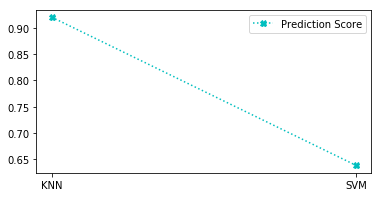

In [60]:
plt.style.use('seaborn-colorblind')
fig, ax =plt.subplots(figsize=(6,3))
ax.plot(list,scores_list,marker="X", linestyle=":", color="c", label ="Prediction Score")
ax.legend()
plt.show()